# Analysis of Airport Passenger Movements in Australia's airports
*Last modified on 11 November 2019*

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import linregress
from motionchart.motionchart import MotionChart

In [2]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:960px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

We will now analyze the airport passenger movements by year since 1985 in 20 of Australia's major airports and the total in Australia.

The dataset can be retrieved from the Australian Government website: https://data.gov.au/data/dataset/airport-traffic-data/resource/38bdc971-cb22-4894-b19a-814afc4e8164?view_id=3cc92f95-9952-4a91-b9c6-d60662524070


In [3]:
# @hidden_cell

# EDIT AS DEEMED APPROPRIATE
airport_dataset_dir = "" 

In [4]:
airport_df = pd.read_csv(airport_dataset_dir + "mon_pax_web.csv", sep=",")

In [5]:
airport_df.head(5)

,AIRPORT,Year,Month,Dom_Pax_In,Dom_Pax_Out,Dom_Pax_Total,Int_Pax_In,Int_Pax_Out,Int_Pax_Total,Pax_In,Pax_Out,Pax_Total
0,ADELAIDE,1985,1,81661,81630,163291,5806,4733,10539,87467,86363,173830
1,ALICE SPRINGS,1985,1,19238,17887,37125,0,0,0,19238,17887,37125
2,All Australian Airports,1985,1,1192395,1192395,2384790,263795,208770,472565,1456190,1401165,2857355
3,BALLINA,1985,1,0,0,0,0,0,0,0,0,0
4,BRISBANE,1985,1,120950,120776,241726,25867,19178,45045,146817,139954,286771


Because this dataset also included records with `All Australian Airports` as well, as would need to separate data about individual airports and all Australian airports into two dataframes.

In [6]:
ind_airport_df = airport_df.copy()
au_airport_df = airport_df.copy()

ind_airport_df = ind_airport_df[ind_airport_df["AIRPORT"] != "All Australian Airports"].reset_index()
au_airport_df = au_airport_df[au_airport_df["AIRPORT"] == "All Australian Airports"].reset_index()

We can now analyze the passenger movements of individual airports, and then visualize the year-by-year passenger movements for each airport using motion chart.

Since the calendar year 2019 has not ended, we exclude data from this year for this analysis.

In [7]:
ind_airport_df_year_int = ind_airport_df.groupby(["AIRPORT", "Year"])["Dom_Pax_In", "Dom_Pax_Out", "Dom_Pax_Total", "Int_Pax_In", "Int_Pax_Out", "Int_Pax_Total", "Pax_In", "Pax_Out", "Pax_Total"].sum().reset_index()
ind_airport_df_year_int = ind_airport_df_year_int[ind_airport_df_year_int["Year"] != 2019]

# Divide values by 1000 for better visualisation on MotionChart
ind_airport_df_year_int["Dom_Pax_In"] = ind_airport_df_year_int["Dom_Pax_In"].apply(lambda x: x/1000)
ind_airport_df_year_int["Dom_Pax_Out"] = ind_airport_df_year_int["Dom_Pax_Out"].apply(lambda x: x/1000)
ind_airport_df_year_int["Dom_Pax_Total"] = ind_airport_df_year_int["Dom_Pax_Total"].apply(lambda x: x/1000)
ind_airport_df_year_int["Int_Pax_In"] = ind_airport_df_year_int["Int_Pax_In"].apply(lambda x: x/1000)
ind_airport_df_year_int["Int_Pax_Out"] = ind_airport_df_year_int["Int_Pax_Out"].apply(lambda x: x/1000)
ind_airport_df_year_int["Int_Pax_Total"] = ind_airport_df_year_int["Int_Pax_Total"].apply(lambda x: x/1000)
ind_airport_df_year_int["Pax_In"] = ind_airport_df_year_int["Pax_In"].apply(lambda x: x/1000)
ind_airport_df_year_int["Pax_Out"] = ind_airport_df_year_int["Pax_Out"].apply(lambda x: x/1000)
ind_airport_df_year_int["Pax_Total"] = ind_airport_df_year_int["Pax_Total"].apply(lambda x: x/1000)

convert_columns = {
    "Dom_Pax_In": "Domestic Arrivals (in thousands)",
    "Dom_Pax_Out": "Domestic Departures (in thousands)",
    "Dom_Pax_Total": "Domestic Movements (in thousands)",
    "Int_Pax_In": "International Arrivals (in thousands)",
    "Int_Pax_Out": "International Departures (in thousands)",
    "Int_Pax_Total": "International Movements (in thousands)",
    "Pax_In": "Total Arrivals (in thousands)",
    "Pax_Out": "Total Departures (in thousands)",
    "Pax_Total": "Total Movements (in thousands)"
}

ind_airport_df_year_int.rename(columns=convert_columns, inplace=True)
ind_airport_df_year_int.head(5)

# ind_airport_df_year_int[ind_airport_df_year_int["AIRPORT"] == "MELBOURNE"]#.head(5)

,AIRPORT,Year,Domestic Arrivals (in thousands),Domestic Departures (in thousands),Domestic Movements (in thousands),International Arrivals (in thousands),International Departures (in thousands),International Movements (in thousands),Total Arrivals (in thousands),Total Departures (in thousands),Total Movements (in thousands)
0,ADELAIDE,1985,957.880,953.867,1911.747,55.353,52.681,108.034,1013.233,1006.548,2019.781
1,ADELAIDE,1986,991.011,987.422,1978.433,70.273,66.298,136.571,1061.284,1053.720,2115.004
2,ADELAIDE,1987,1004.223,1004.620,2008.843,71.765,67.927,139.692,1075.988,1072.547,2148.535
3,ADELAIDE,1988,1082.379,1081.872,2164.251,72.473,68.411,140.884,1154.852,1150.283,2305.135
4,ADELAIDE,1989,864.156,870.896,1735.052,75.625,71.553,147.178,939.781,942.449,1882.230


In [8]:
mChart2 = MotionChart(df = ind_airport_df_year_int, key="Year", x="Domestic Arrivals (in thousands)", y="International Arrivals (in thousands)", xscale="linear", yscale="linear", size="Total Movements (in thousands)", color="AIRPORT", category="AIRPORT")
mChart2.to_notebook()

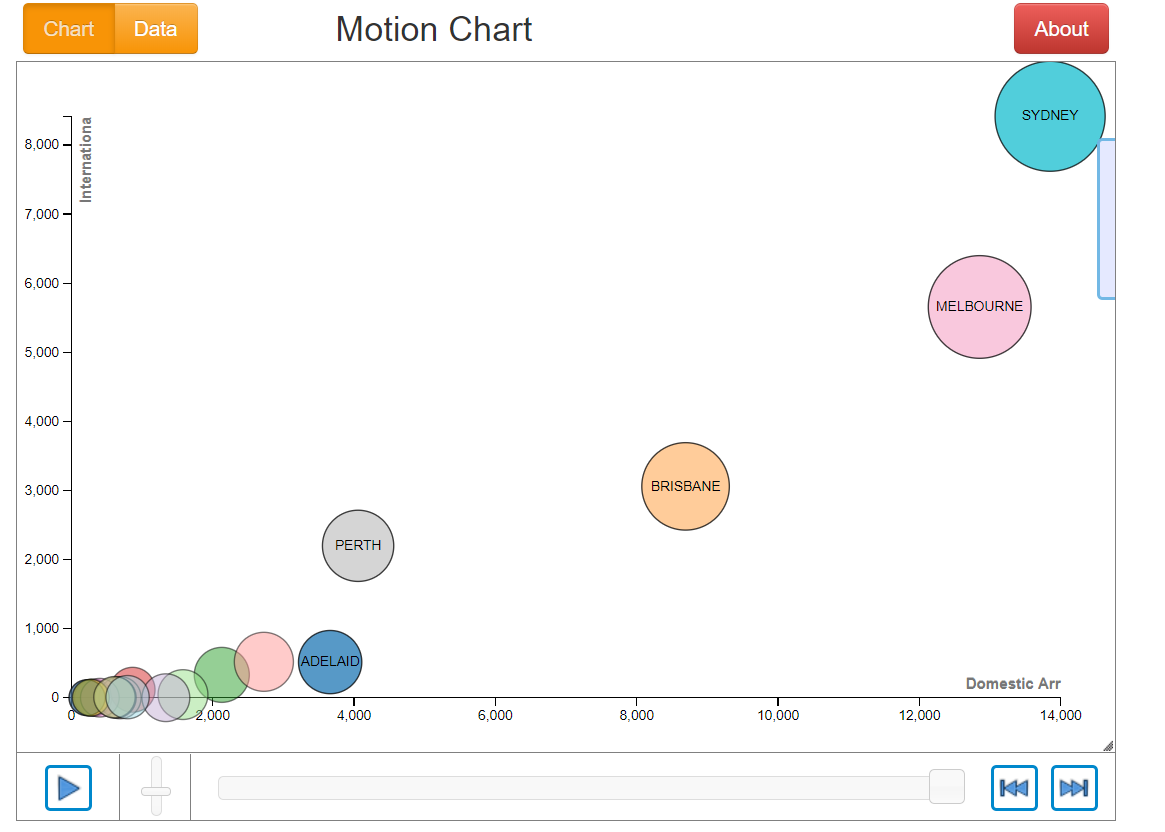

From the motion chart (with attached screenshot) above, we can observe that Sydney is the airport with both the highest international arrivals and the highest domestic arrivals in all of the years from 1985 to 2018, followed by Melbourne, Brisbane, and then Perth.

Finally, we can analyze the total international passenger arrivals by year, and make an estimate of the total international passenger arrivals of a future year. Because the year 2019 is incomplete, we will exclude the year from this analysis.

In [9]:
au_airport_df_intpaxin = au_airport_df.groupby("Year")["Int_Pax_In"].sum().reset_index()
au_airport_df_intpaxin = au_airport_df_intpaxin[au_airport_df_intpaxin["Year"] != 2019]
display(au_airport_df_intpaxin.head(5))
display(au_airport_df_intpaxin.tail(5))

,Year,Int_Pax_In
0,1985,2646731
1,1986,2973834
2,1987,3436278
3,1988,3955119
4,1989,4015692


,Year,Int_Pax_In
29,2014,16645812
30,2015,17517506
31,2016,18913689
32,2017,19931301
33,2018,20889591


By peeking into the total international passenger arrivals by year, we can see that the values have been increasing, and as a result, we attempt to use linear regression to plot a line of best fit.

In [10]:
gradient_intpaxin, intercept_intpaxin, r_value_intpaxin, p_value_intpaxin, std_err_intpaxin = linregress(au_airport_df_intpaxin["Year"], au_airport_df_intpaxin["Int_Pax_In"])

line_intpaxin = [gradient_intpaxin * xi + intercept_intpaxin for xi in au_airport_df_intpaxin["Year"]]

print("Gradient:", gradient_intpaxin)
print("Intercept:", intercept_intpaxin)

Gradient: 513744.58426279604
Intercept: -1018616724.4019862


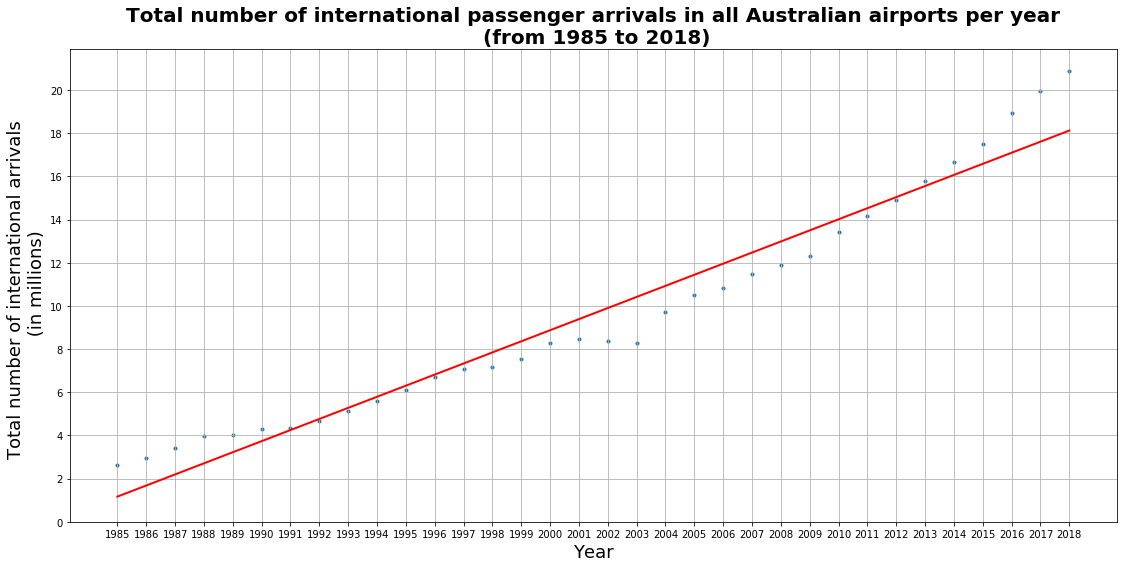

In [11]:
au_airport_df_intpaxin_plot = au_airport_df_intpaxin.copy()

# Divide by 1 million
au_airport_df_intpaxin_plot["Int_Pax_In"] = au_airport_df_intpaxin_plot["Int_Pax_In"].apply(lambda x: x/1000000)
line_intpaxin_plot =  [x / 1000000 for x in line_intpaxin]

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
ax.scatter(au_airport_df_intpaxin_plot["Year"], au_airport_df_intpaxin_plot["Int_Pax_In"], marker=".")
ax.plot(au_airport_df_intpaxin["Year"], line_intpaxin_plot, 'r-', linewidth=2)
ax.set_title("Total number of international passenger arrivals in all Australian airports per year\n (from 1985 to 2018)", fontsize=20, fontweight="bold")
ax.set_xticks(au_airport_df_intpaxin_plot["Year"], )
ax.set_yticks(np.arange(0, 22, 2))
ax.set_xlabel("Year", fontsize=18)
ax.set_ylabel("Total number of international arrivals \n (in millions)", fontsize=18)
# ax.ticklabel_format(style="plain")
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
intpaxin_2050 = gradient_intpaxin * 2050 + intercept_intpaxin
intpaxin_2100 = gradient_intpaxin * 2100 + intercept_intpaxin
year_to_reach_50_million = (50000000 - intercept_intpaxin) / gradient_intpaxin
print("Expected international airport arrivals in 2050:", int(intpaxin_2050))
print("Expected international airport arrivals in 2100:", int(intpaxin_2100))
print("Expected year that international airport arrivals will hit 50 million:", int(year_to_reach_50_million))

Expected international airport arrivals in 2050: 34559673
Expected international airport arrivals in 2100: 60246902
Expected year that international airport arrivals will hit 50 million: 2080


Based on the linear regression model illustrated above, rounded off to the nearest integer, we would expect the total number of international airport arrivals in all Australian airports combined to reach 34559673 (approx. 34.55 million) in 2050, and 60246902 (approx. 60.25 million) in 2100. We will expect the total number of international airport arrivals to hit 50 million sometime in 2080.

We can also make analyses on the airport passenger movements by month.

In [13]:
au_airport_df_month_int = au_airport_df.copy()
au_airport_df_month_int = au_airport_df_month_int[au_airport_df_month_int["Year"] != 2019]

au_airport_df_month_int = au_airport_df_month_int.groupby(["AIRPORT", "Month"])["Dom_Pax_In", "Dom_Pax_Out", "Dom_Pax_Total", "Int_Pax_In", "Int_Pax_Out", "Int_Pax_Total", "Pax_In", "Pax_Out", "Pax_Total"].mean().reset_index()

convert_columns2 = {
    "Dom_Pax_In": "Average Domestic Arrivals (in thousands)",
    "Dom_Pax_Out": "Average Domestic Departures (in thousands)",
    "Dom_Pax_Total": "Average Domestic Movements (in thousands)",
    "Int_Pax_In": "Average International Arrivals (in thousands)",
    "Int_Pax_Out": "Average International Departures (in thousands)",
    "Int_Pax_Total": "Average International Movements (in thousands)",
    "Pax_In": "Average Total Arrivals (in thousands)",
    "Pax_Out": "Average Total Departures (in thousands)",
    "Pax_Total": "Average Total Movements (in thousands)"
}

convert_months = {
    1: "Jan",
    2: "Feb",
    3: "Mar",
    4: "Apr",
    5: "May",
    6: "Jun",
    7: "Jul",
    8: "Aug",
    9: "Sept",
    10: "Oct",
    11: "Nov",
    12: "Dec"
}

for key,value in convert_columns2.items():
    au_airport_df_month_int[key] = au_airport_df_month_int[key].apply(lambda x: x/1000)
    
au_airport_df_month_int.rename(columns=convert_columns2, inplace=True)
au_airport_df_month_int["Month"] = au_airport_df_month_int["Month"].apply(lambda x: convert_months[x])
au_airport_df_month_int.head(5)

,AIRPORT,Month,Average Domestic Arrivals (in thousands),Average Domestic Departures (in thousands),Average Domestic Movements (in thousands),Average International Arrivals (in thousands),Average International Departures (in thousands),Average International Movements (in thousands),Average Total Arrivals (in thousands),Average Total Departures (in thousands),Average Total Movements (in thousands)
0,All Australian Airports,Jan,2932.041706,2932.041706,5864.083412,958.457765,833.829824,1792.287588,3890.499471,3765.871529,7656.371000
1,All Australian Airports,Feb,2624.590794,2624.590794,5249.181588,780.555912,682.701235,1463.257147,3405.146706,3307.292029,6712.438735
2,All Australian Airports,Mar,2973.933529,2973.933529,5947.867059,751.607588,780.539206,1532.146794,3725.541118,3754.472735,7480.013853
3,All Australian Airports,Apr,2942.089029,2942.089029,5884.178059,746.609618,779.011794,1525.621412,3688.698647,3721.100824,7409.799471
4,All Australian Airports,May,2835.086500,2835.086500,5670.173000,658.633912,722.798588,1381.432500,3493.720412,3557.885088,7051.605500


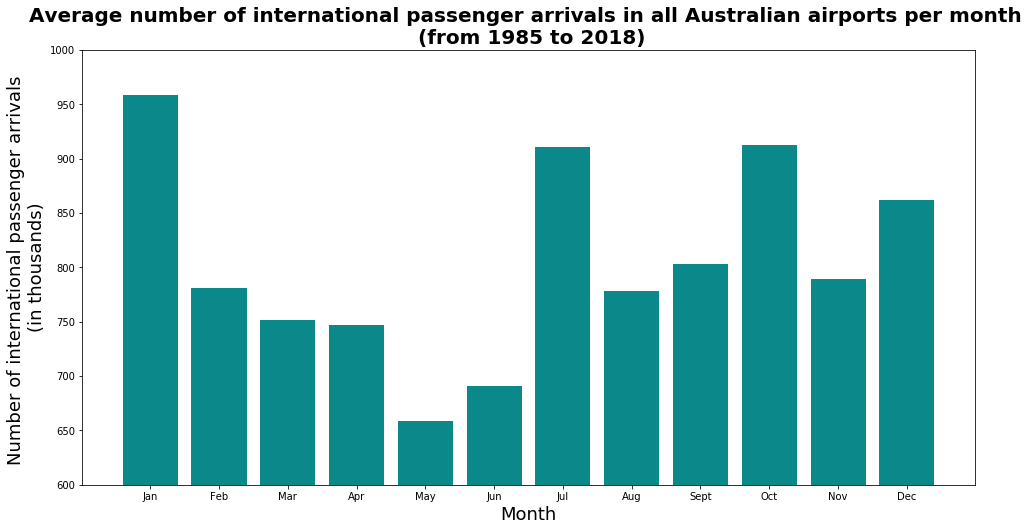

In [14]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
ax.bar(au_airport_df_month_int["Month"], au_airport_df_month_int["Average International Arrivals (in thousands)"], color="#0a888a")
ax.set_ylim(600, 1000)
ax.set_xlabel("Month", fontsize=18)
ax.set_ylabel("Number of international passenger arrivals \n(in thousands)", fontsize=18)
ax.set_title("Average number of international passenger arrivals in all Australian airports per month \n (from 1985 to 2018)", fontsize=20, fontweight="bold")
plt.show()

From the bar plot above, we can see that January, July, October and December are the months with higher international passenger arrivals. This trend could be attributed to the <a href="http://www.bom.gov.au/climate/glossary/seasons.shtml">seasonal climate in Australia</a>, as well as the <a href="https://www.education.gov.au/school-term-dates-2019">school vacation periods</a>.

The results of these analyses are useful for the <a href="http://www.tourisminvestment.com.au/en/why-australia/aviation-access.html">aviation industry</a> to predict the future demand of aviation services in the future, and in hopes to bring valuable insights for the increased demand in airports in terms of its capacity, the number or frequency of flights (or possibly even new routes), and the manpower included to account for facilities management in the future. 

The <a href="https://www.myskills.gov.au/industries/tourism-hospitality">tourism and hospitality industry</a> may also benefit from the analyses of international passenger movements which may lead to an increase in demand for hospitality services, and potentially yield higher profits for the sector.

<div class="alert alert-info" style="color:black; text-align:center; font-weight:bold;">
--- The End ---<br/>
</div>